<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h4 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment 3</h4>
<h5 align="center"><font color="cyan"> Feel free to contact TA team for any possible questions about the assignment </font>
 </h5>
<h5 align="center"> <font color="cyan"> Questions 1,2: @mh_momeni  -  Question 2,3: @Mahdi_h721 </font> </h5>


You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

##  Q1. Implementing QR Factorization <sub><sup>``(40 pt.)``</sup></sub>

>In this question, we are going to use QR factorization in computing eigenvalues. It is an important building block in numerical linear algebra. Recall that for any matrix $A$
, $A=QR$
 where $Q$
 is orthogonal and $R$
 is upper-triangular.

 **Reminder**: The QR algorithm, uses the QR decomposition, but don't confuse the two.

In [21]:
import numpy as np
np.set_printoptions(suppress=True, precision=4)

In [22]:
n = 5
A = np.random.rand(n,n)
npQ, npR = np.linalg.qr(A)

Check that Q is orthogonal:


In [23]:
np.allclose(np.eye(n), npQ @ npQ.T), np.allclose(np.eye(n), npQ.T @ npQ)

(True, True)

Check that R is triangular

In [24]:
npR

array([[-1.3557, -1.1105, -1.0149, -1.0602, -1.1616],
       [ 0.    , -0.8924, -0.6773, -0.5657,  0.0478],
       [ 0.    ,  0.    , -0.7145, -0.0785, -0.6492],
       [ 0.    ,  0.    ,  0.    , -0.3576,  0.3468],
       [ 0.    ,  0.    ,  0.    ,  0.    , -0.304 ]])

### Gram-Schmidt

#### Classical Gram-Schmidt (unstable)

For each $j$
, calculate a single projection

$$v_j=P_ja_j$$

where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

In [25]:
def cgs(A):
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    ##Your Code start here
    for col_index in range(n):
        col_vector = np.array(A[:, col_index])
        temp_vector = col_vector.copy()

        for prev_col_index in range(col_index):
            prev_col = Q[:, prev_col_index]
            temp_vector -= (prev_col.T @ col_vector) * prev_col
        
        magnitude = np.linalg.norm(temp_vector)
        Q[:, col_index] = temp_vector / magnitude

    for row_index in range(m):
        for col_index in range(row_index, n):
            R[row_index, col_index] = Q[:, row_index].T @ A[:, col_index].T
    ##Your Code ends here
    return Q, R

In [26]:
Q, R = cgs(A)
np.allclose(A, Q @ R)

True

Check if Q is unitary:

In [27]:
np.allclose(np.eye(len(Q)), Q.dot(Q.T))

True

### Modified Gram-Schmidt (optional)

Classical (unstable) Gram-Schmidt: for each $j$
, calculate a single projection
$$v_j=P_ja_j$$
where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

Modified Gram-Schmidt: for each $j$
, calculate $j−1$
 projections
$$P_j=P_{⊥q_{j−1}⋯⊥q_2⊥q_1}$$

In [28]:
n = 3
A = np.random.rand(n,n).astype(np.float64)

In [29]:
def mgs(A):
    V = A.copy()
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    ##Your Code start here
    for j in range(n):
        R[j,j] = np.linalg.norm(V[:,j])
        Q[:,j] = V[:,j] / R[j,j]
        for k in range(j+1,n):
            q = Q[:,j]
            R[j,k] = np.matmul(q.T,V[:,k])
            V[:,k] = V[:,k] - R[j,k] * q
    ##Your Code ends here
    return Q, R

In [30]:
Q, R = mgs(A)
np.allclose(np.eye(len(Q)), Q.dot(Q.T.conj()))

True

In [31]:
np.allclose(A, np.matmul(Q,R))

True

### Classical vs Modified Gram-Schmidt

In this part, we want to construct a square matrix $A$ with random singular vectors and widely varying singular values spaced by factors of 2 between $2^{−1}$
 and $2^{−(n+1)}$

In [32]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [33]:
n = 100
U, X = np.linalg.qr(np.random.randn(n,n))   # set U to a random orthogonal matrix
V, X = np.linalg.qr(np.random.randn(n,n))   # set V to a random orthogonal matrix
S = np.diag(np.power(2,np.arange(-1,-(n+1),-1), dtype=float))  # Set S to a diagonal matrix w/ exp
                                                              # values between 2^-1 and 2^-(n+1)

In [34]:
A = np.matmul(U,np.matmul(S,V))
QC, RC = cgs(A)
QM, RM = mgs(A) # if you don't complete the mgs function, comment this line

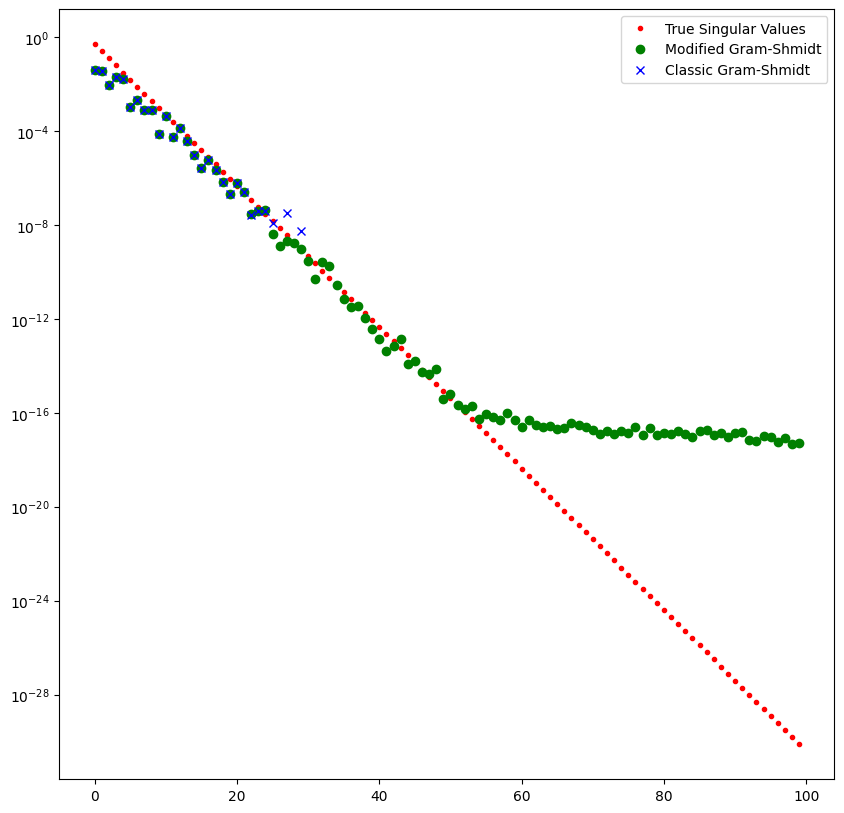

In [35]:
plt.figure(figsize=(10,10))
plt.semilogy(np.diag(S), 'r.', label="True Singular Values")
plt.semilogy(np.diag(RM), 'go', label="Modified Gram-Shmidt")
plt.semilogy(np.diag(RC), 'bx', label="Classic Gram-Shmidt")
plt.legend()
rcParams.update({'font.size': 18})

### Eigenvalue Decomposition using QR Factorization

Use the QR algorithm (or QR method) to get the eigenvalues of matrix $A$. Do 100 iterations, and print out the 1st, 5th, 10th, 20th and 100th iteration.

 **Reminder**: The QR algorithm (or QR method), uses the QR factorization, but don't confuse the two.

In [36]:
##Your Code start here
def eigenvalue_iteration(A):
    current_matrix = A.copy()
    for iteration_number in range(1, 101):
        orthogonal_matrix_Q, upper_triangular_matrix_R = cgs(current_matrix)
        current_matrix = upper_triangular_matrix_R @ orthogonal_matrix_Q
        if iteration_number in [1, 5, 10, 20, 100]:
            # Print the eigenvalues of the current iteration
            print('Eigenvalues of Iteration ' + str(iteration_number) + ':', np.sort(np.diag(current_matrix)))

##Your Code ends here

In [37]:
A = np.array([1.0, -1.0, 0.0, 0.0, -1.0, 1.0, -1.0, 0.0, 0.0, -1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0]).reshape((4, 4))
print("The matrix: \n", A)

print("\n --- Built-in ---")
print(np.linalg.eig(A)[0])
##Your Code start here
eigenvalue_iteration(A)
##Your Code ends here

The matrix: 
 [[ 1. -1.  0.  0.]
 [-1.  1. -1.  0.]
 [ 0. -1.  2.  0.]
 [ 0.  0.  0.  3.]]

 --- Built-in ---
[-0.247   1.445   2.8019  3.    ]
Eigenvalues of Iteration 1: [0. 2. 2. 3.]
Eigenvalues of Iteration 5: [-0.247   1.4541  2.7929  3.    ]
Eigenvalues of Iteration 10: [-0.247   1.4451  2.8019  3.    ]
Eigenvalues of Iteration 20: [-0.247   1.445   2.8019  3.    ]
Eigenvalues of Iteration 100: [-0.247   1.445   2.8019  3.    ]


##  Q2. SVD & Image processing <sub><sup>``(30 pt.)``</sup></sub>

> In this question, we are going to investigate the use of SVD as a tool to obtain the basis of the matrix in digital image processing.
The first issue we will examine is image compression. For this purpose, in general, we can consider the information inside the image as a data matrix, then find a suitable basis for this information matrix and by depicting the primary matrix on the more important basis vectors and keeping the necessary information to show the initial image with less information.
This process results in image compression. It should be noted that for simplicity, the images we are examining in this exercise are in black and white.
>With the help of SVD, we can find a basis for the column space of the image matrix that we want, so that the columns of the image matrix have the highest correlation with the basis vectors.
>On the other hand, if these bases are considered in descending order of the size of the singular values, they will contain the most general information of the columns of the image, so by keeping only r initial columns of the found bases (U) along with the combined vectors (V) and the singular values (Σ) corresponding to them, we can retain the image's overall image with a good approximation.
>From an expert point of view, the reconstruction is actually a lower-order reconstruction of the primary matrix.
In this view, the value of r is the parameter to control the amount of compression we want.

###  part 1

In this part, the compression operation is performed on the input black and white image with the help of SVD analysis. One of the criteria for comparing the initial and final image is the PSNR criterion. Research about this criterion and draw the PSNR diagram in terms of different r. Then compare the results with the diagram by giving some test inputs and plotting the outputs.
One of the inputs you give to the function should be the image pic.jpg.

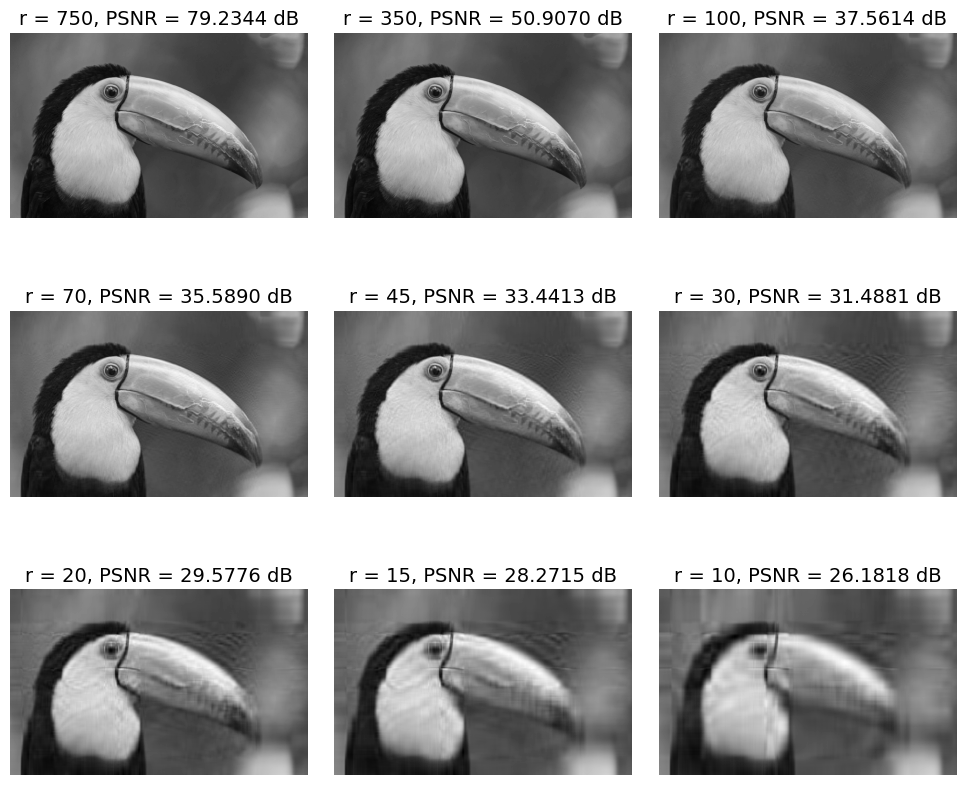

In [38]:
##Your Code start here
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread('pic.jpg', cv2.IMREAD_GRAYSCALE)
m, n = image.shape
U, s, V = np.linalg.svd(image)
fig = plt.figure(figsize=(10, 9))
r_values = [750, 350, 100, 70, 45, 30, 20, 15, 10]
for index, r in enumerate(r_values):
    sigma = np.eye(U.shape[0], V.shape[0]) @ np.diag(np.append(s[:r], np.zeros(V.shape[0] - r)))
    reconstructed_image = U @ sigma @ V
    diff = np.array(reconstructed_image - image, dtype=np.float64)
    mse = np.sum(diff ** 2) / (image.shape[0] * image.shape[1])
    psnr = 20 * np.log10(255) - 10 * np.log10(mse)
    plt.subplot(3, 3, index + 1)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title('r = {}, PSNR = {:.4f} dB'.format(r, psnr), fontsize=14)
    plt.axis('off')


fig.tight_layout()
plt.show()

##Your Code ends here

###  part 2

Another issue that we can explore with a similar idea of applying base transform is removing noise from images. In the condition that the noise in the image is uniform and in such a way that it does not distort the general information in the image. from the point of view of SVD, according to the examination of the general information, the direction of the image vector on bases with larger singular values has not changed much, and removing the information related to Examining general information to vectors with less importance can remove noise and keep the main information of the image.
In this part, add two different noises salt and pepper and Gaussian noise with a desired and appropriate range to the image pic.jpg so that the PSNR of both images is in the same range, then perform the noise reduction process with the help of SVD analysis.
For both noises, draw the PSNR diagram in terms of different r.
  Then compare the results with the graph by plotting a number of outputs.
  Which of the noises is more effective in this method?


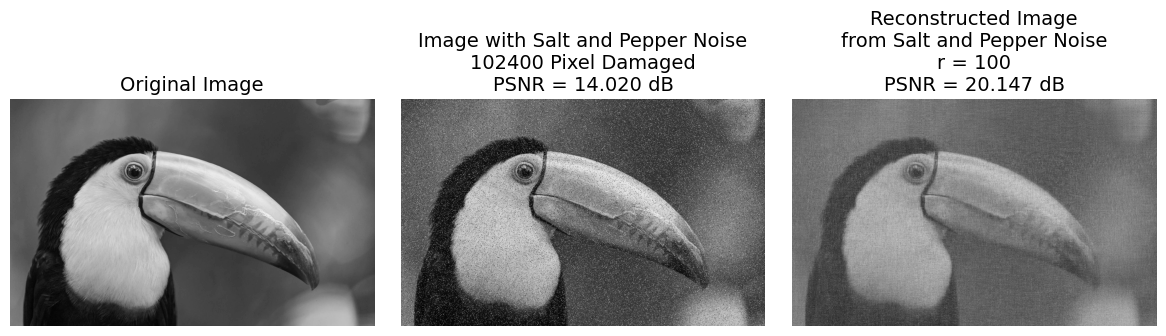

In [39]:
#adding Salt and Pepper noise
##Your Code start here
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title('Original Image', fontsize=14)

salt_paper_noise_image = image.copy()
salt_paper_noise_pixel = 0.05
for i in range(int(salt_paper_noise_pixel * m * n)):
    row_random = np.random.randint(m, size=2)
    column_random = np.random.randint(n, size=2)
    salt_paper_noise_image[row_random[0], column_random[0]] = 0
    salt_paper_noise_image[row_random[1], column_random[1]] = 255

diff = np.array(salt_paper_noise_image - image, dtype=np.float64)
PSNR = 20 * np.log10(255) - 10 * np.log10(np.sum(diff ** 2) / (m * n))

plt.subplot(132)
plt.imshow(salt_paper_noise_image, cmap='gray')
plt.title('Image with Salt and Pepper Noise\n{} Pixel Damaged\nPSNR = {:.3f} dB'.format(int(salt_paper_noise_pixel * m * n * 2), PSNR), fontsize=14)
plt.axis('off')

r = 100
U, s, V = np.linalg.svd(salt_paper_noise_image)
sigma = np.eye(m, n) @ np.diag(np.append(s[:r], np.array([0] * (n - r))))
salt_paper_noise_image_recons = U @ sigma @ V

diff = np.array(salt_paper_noise_image_recons - image, dtype=np.float64)
PSNR = 20 * np.log10(255) - 10 * np.log10(np.sum(diff ** 2) / (m * n))

plt.subplot(133)
plt.imshow(salt_paper_noise_image_recons, cmap='gray')
plt.title('Reconstructed Image\nfrom Salt and Pepper Noise\nr = {}\nPSNR = {:.3f} dB'.format(r, PSNR), fontsize=14)
plt.axis('off')

fig.tight_layout()
plt.show()

##Your Code ends here

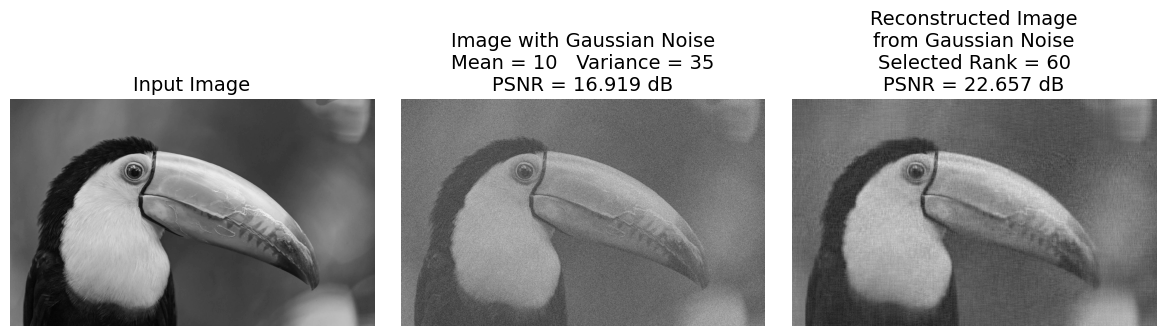

In [40]:
#adding Gaussian noise
fig = plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Input Image', fontsize=14)
plt.axis('off')

mean_noise, var_noise = 10, 35
gaussian_noisy_img = np.random.normal(mean_noise, var_noise, (m, n)) + image
diff = np.array(gaussian_noisy_img - image, dtype=np.float64)
PSNR = 20 * np.log10(255) - 10 * np.log10(np.sum(diff ** 2) / (m * n))

plt.subplot(132)
plt.imshow(gaussian_noisy_img, cmap='gray')
plt.title('Image with Gaussian Noise\nMean = {}   Variance = {}\nPSNR = {:.3f} dB'.format(mean_noise, var_noise, PSNR), fontsize=14)
plt.axis('off')

plt.subplot(133)
selected_rank = 60
U, singular_values, V = np.linalg.svd(gaussian_noisy_img)
sigma = np.eye(m, n) @ np.diag(np.append(singular_values[:selected_rank], np.zeros(n - selected_rank)))
reconstructed_img = U @ sigma @ V
diff = np.array(reconstructed_img - image, dtype=np.float64)
PSNR = 20 * np.log10(255) - 10 * np.log10(np.sum(diff ** 2) / (m * n))
plt.imshow(reconstructed_img, cmap='gray')
plt.title('Reconstructed Image\nfrom Gaussian Noise\nSelected Rank = {}\nPSNR = {:.3f} dB'.format(selected_rank, PSNR), fontsize=14)
plt.axis('off')

fig.tight_layout()
plt.show()




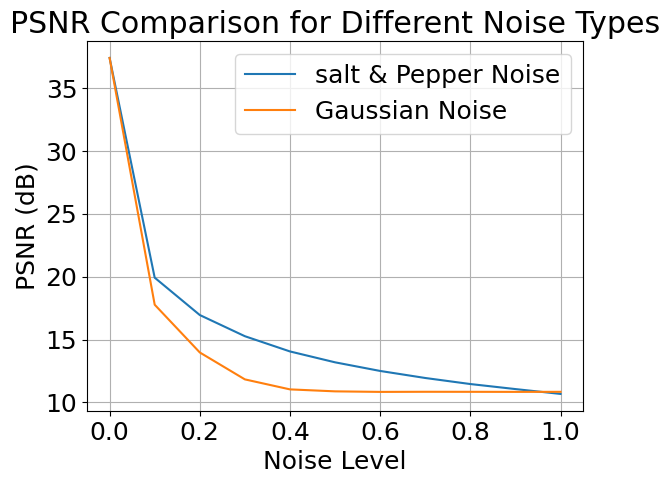

In [42]:
def add_salt_and_pepper_noise(image, noise_level):
    noisy_image = np.copy(image)
    rows, cols = noisy_image.shape
    salt_amount = np.ceil(noise_level * image.size * 0.5)
    salt_coords = np.random.choice(rows * cols, int(salt_amount), replace=False)
    noisy_image.ravel()[salt_coords] = 255

    pepper_amount = np.ceil(noise_level * image.size * 0.5)
    pepper_coords = np.random.choice(rows * cols, int(pepper_amount), replace=False)
    noisy_image.ravel()[pepper_coords] = 0

    return noisy_image

def add_gaussian_corruption(image, mean=0, std_dev=10):
    corrupted_image = np.copy(image)
    rows, cols = corrupted_image.shape
    gauss_noise = np.random.normal(mean, std_dev, (rows, cols))
    corrupted_image += gauss_noise.astype(np.uint8)
    return corrupted_image

def denoise_using_svd(corrupted_image, rank):
    U, S, V = np.linalg.svd(corrupted_image)
    U_truncated = U[:, :rank]
    S_truncated = np.diag(S[:rank])
    V_truncated = V[:rank, :]
    denoised_image = np.dot(U_truncated, np.dot(S_truncated, V_truncated))
    return denoised_image

def calculate_psnr(original_image, compressed_image):
    mse = np.mean((original_image - compressed_image) ** 2)
    max_pixel = np.max(original_image)
    return 20 * np.log10(max_pixel / np.sqrt(mse))

original_image = cv2.imread('pic.jpg', cv2.IMREAD_GRAYSCALE)

noise_levels = np.linspace(0, 1, 11)
rank = 100 

psnr_salt_pepper = []
psnr_gaussian = []

for noise_level in noise_levels:
    salt = add_salt_and_pepper_noise(original_image, noise_level)
    gaussian_corrupted_image = add_gaussian_corruption(original_image, std_dev=noise_level*255)
    denoised_salt_pepper_image = denoise_using_svd(salt, rank)
    denoised_gaussian_image = denoise_using_svd(gaussian_corrupted_image, rank)
    psnr_salt_pepper.append(calculate_psnr(original_image, denoised_salt_pepper_image))
    psnr_gaussian.append(calculate_psnr(original_image, denoised_gaussian_image))


plt.plot(noise_levels, psnr_salt_pepper, label='salt & Pepper Noise')
plt.plot(noise_levels, psnr_gaussian, label='Gaussian Noise')
plt.xlabel('Noise Level')
plt.ylabel('PSNR (dB)')
plt.title('PSNR Comparison for Different Noise Types')
plt.legend()
plt.grid(True)
plt.show()


As we can see, reconstructing from Gaussian noise is more effective.

##  Q3. PCA and Clustering <sub><sup>``(40 pt.)``</sup></sub>
In this problem we want to cluster some data points.
But first, you should reduce the number of features by the PCA algorithm then use kmeans clustering algorithm

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples


### Import Dataset

In [2]:
Datapoint = pd.read_csv('Datapoint.csv')

### Correlation Heatmap

In this part plot the correlation Heatmap of features.
what is your suggestion about the number of principal components that they have high variance? Explain why.

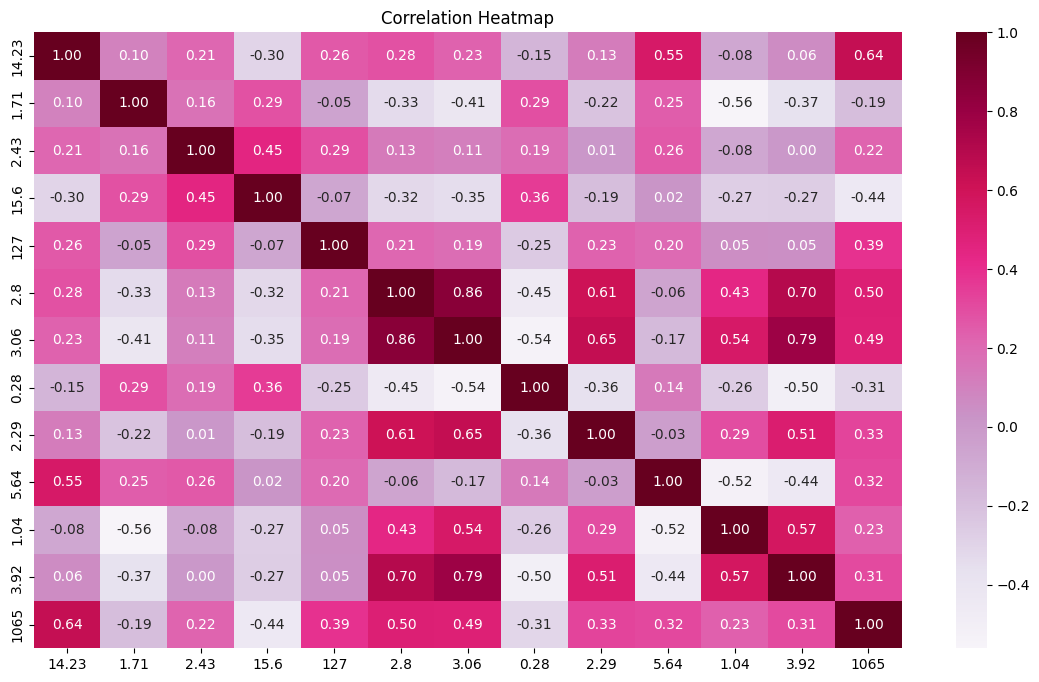

In [3]:
##Your Code start here
df = pd.DataFrame(Datapoint)
corr_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(14,8))
sns.heatmap(corr_matrix, annot=True, cmap='PuRd', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
##Your Code ends here

###  Data Preprocessing

In [4]:
Datapoint.head()

,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


### PCA (Principal Component Analysis)
> As you know for applying PCA we should scale our data points.Here we use MinMax and Standard Scaler.
(First, use Standard Scaler)

Calculate principal components and plot Explained variance by each component.

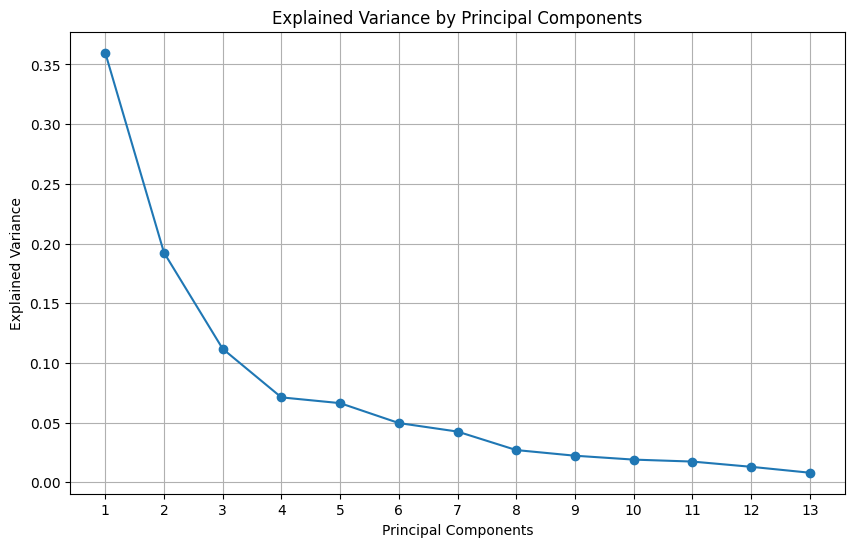

In [5]:
##Your Code start here
data_frame = Datapoint.copy()
data_scaler = StandardScaler()
scaled_data = data_scaler.fit_transform(data_frame)
covariance_matrix = np.cov(scaled_data, rowvar=False)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
sorted_indices = np.argsort(eigen_values)[::-1]
sorted_eigen_values = eigen_values[sorted_indices]
sorted_eigen_vectors = eigen_vectors[:, sorted_indices]
explained_variance = sorted_eigen_values / np.sum(sorted_eigen_values)


plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()


##Your Code ends here

Apply PCA Algorithm from scratch and reduce the number of features to the number you have guessed in previous parts.

In [6]:
##Your Code start here

def preprocess_data(input_data):
    data_mean = np.mean(input_data, axis=0)
    data_std_dev = np.std(input_data, axis=0)
    standardized_data = (input_data - data_mean) / data_std_dev
    return standardized_data, data_mean, data_std_dev

standardized_data, mean_values, std_dev_values = preprocess_data(data_frame)
covariance_matrix = np.cov(standardized_data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
num_principal_components = 3
principal_components = sorted_eigenvectors[:, :num_principal_components]
reduced_data = np.dot(standardized_data, principal_components)
reduced_data_frame = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(num_principal_components)])
reduced_data_array1 = reduced_data_frame.values

##Your Code ends here

### PCA plot in 2D
Plot data points using their two first features.What do you think about the number of clusters?

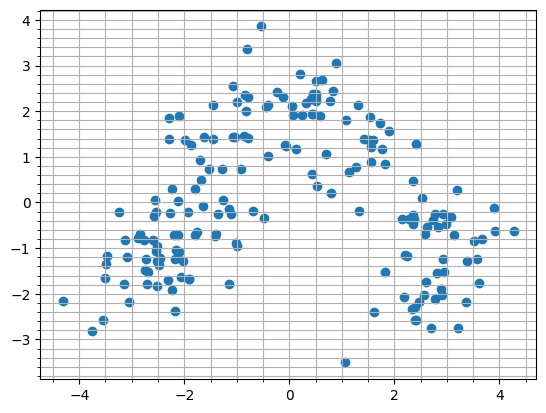

In [7]:
##Your Code start here
plt.scatter(reduced_data_array1[:,0],reduced_data_array1[:,1])
plt.grid('True','both')
plt.minorticks_on()
##Your Code ends herereduced_data_array

### Do all previous steps for MinMax Scaling
Tell your opinion about diffrences.




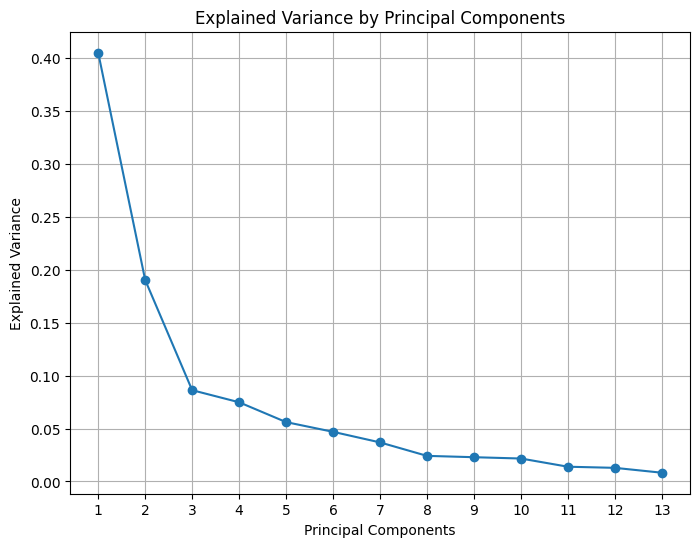

In [8]:
##Your Code start here

def scale_data(input_data):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(input_data)
    return scaled_data
data_frame_2 = Datapoint.copy()
scaled_data = scale_data(data_frame_2)
covariance_matrix = np.cov(scaled_data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
num_principal_components = 3 
principal_components = sorted_eigenvectors[:, :num_principal_components]
reduced_data = np.dot(scaled_data, principal_components)
reduced_data_frame2 = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(num_principal_components)])
explained_variance2 = sorted_eigenvalues / np.sum(sorted_eigenvalues)
reduced_data_array2 = reduced_data_frame2.values
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance2) + 1), explained_variance2, marker='o', linestyle='-')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.xticks(range(1, len(explained_variance2) + 1))
plt.grid(True)
plt.show()

##Your Code ends here

In my opinion n=3 is the best option here.

### KMeans Clustering
#### Elbow Method for Determining Cluster Amount on  Dataset

Using the elbow method to find the optimal number of clusters

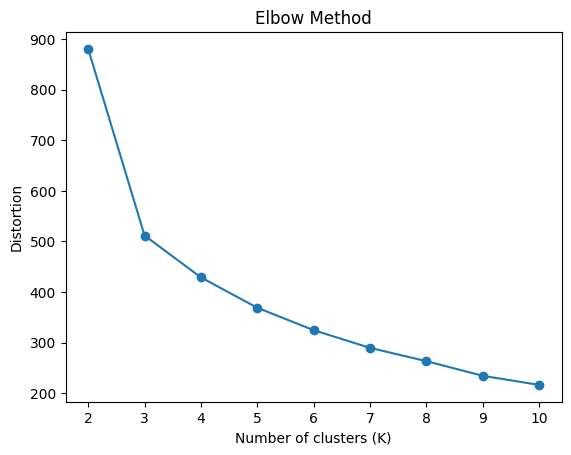

In [9]:
##Your Code start here
# Yellowbrick library didn't work properly for me so I had to use a different method.
def elbow_method(data, k_range=(2, 10)):
    distortions = []
    k_values = range(k_range[0], k_range[1] + 1)
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    
    return distortions

pca_std_datapoint1 = reduced_data_array1

pca_std_datapoint2 =reduced_data_array2
distortions = elbow_method(pca_std_datapoint1, k_range=(2, 10))

k_values = range(2, 11)
plt.plot(k_values, distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Distortion')
plt.show()

##Your Code ends here

What is inertia and silhouette metrics?
Explain them briefly.




### Interia :
Inertia evaluates the effectiveness of K-Means clustering in organizing a dataset. It quantifies this by computing the distance between each data point and its centroid, squaring this distance, and then summing up these squares for each cluster.


### silhouette :
The silhouette coefficient or silhouette score in K-means is an indicator of how closely a data point resembles others within its cluster (cohesion) versus those in different clusters (separation).

In [10]:
#You should save your final datapoints in pca_std_datapoint variable
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(pca_std_datapoint1)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [00:00<00:00, 21.76it/s]


In [11]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_std_datapoint1)
    silhouette[i] = sil(pca_std_datapoint1, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:00<00:00, 21.63it/s]


Plot the **inertia** and **silhouette ** values

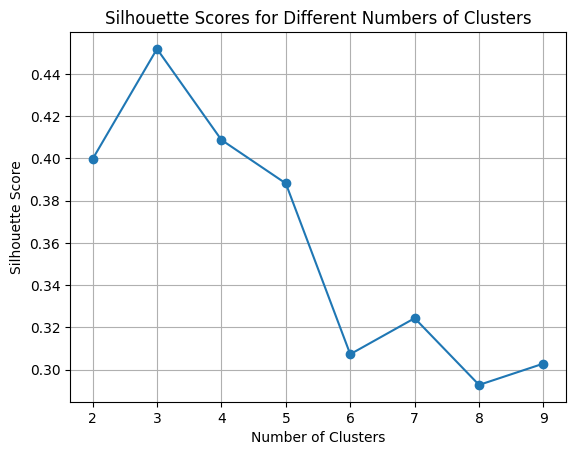

In [12]:
##Your Code start here
plt.plot(list(silhouette.keys()), list(silhouette.values()), marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 10))
plt.grid(True)
plt.show()
##Your Code ends here

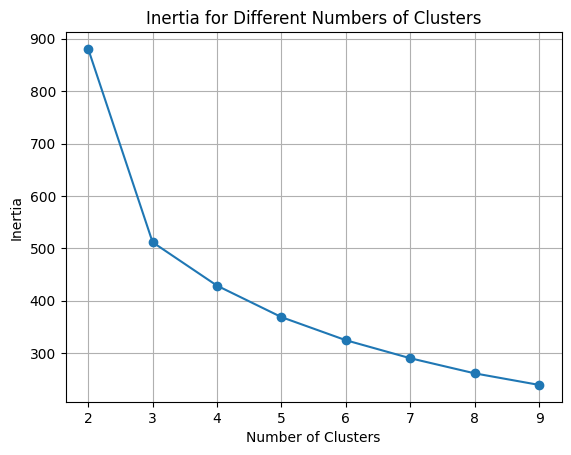

In [13]:
plt.plot(list(silhouette.keys()),inertia, marker='o')
plt.title('Inertia for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(2, 10))
plt.grid(True)
plt.show()

Tune the hyper parameters based on your conclusions.

In [14]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans1 = model_kmeans.fit_predict(pca_std_datapoint1)


c:\Users\debug system\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


#Now plot the datapoints usig two first features
(Each cluster in a different colour)

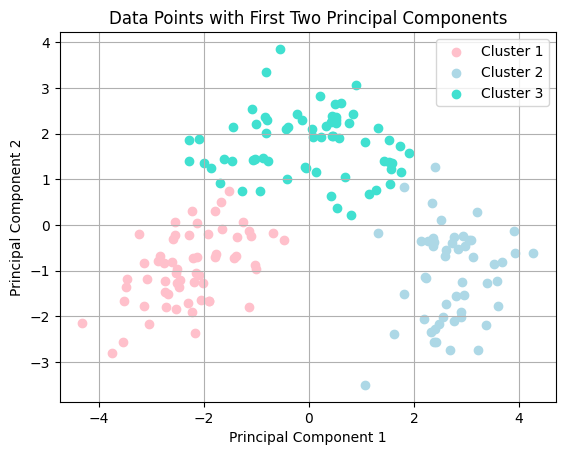

In [15]:
# Define colors for each cluster
colors = ['pink', 'lightblue', 'turquoise']

# Loop through unique cluster labels
for i, cluster_label in enumerate(np.unique(y_predict_kmeans1)):
    # Extract data points belonging to the current cluster
    cluster_data = pca_std_datapoint1[y_predict_kmeans1 == cluster_label]
    
    # Plot the data points for the current cluster with respective color
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_label+1}', color=colors[i])

plt.title('Data Points with First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


Do all previous steps for MinMax scaled data points.





In [16]:
from tqdm import tqdm

inertia_scores = []
silhouette_scores = {}

for i in tqdm(range(2, 10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_std_datapoint2)
    inertia_scores.append(kmeans.inertia_)
    silhouette_scores[i] = sil(pca_std_datapoint2, kmeans.labels_, metric='euclidean')


100%|██████████| 8/8 [00:00<00:00, 20.69it/s]


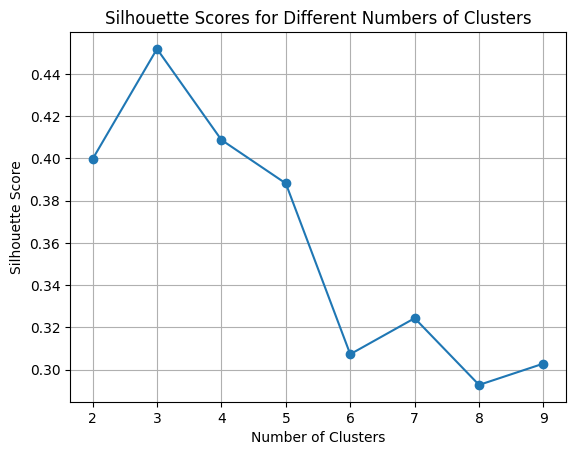

In [17]:
plt.plot(list(silhouette.keys()), list(silhouette.values()), marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 10))
plt.grid(True)
plt.show()

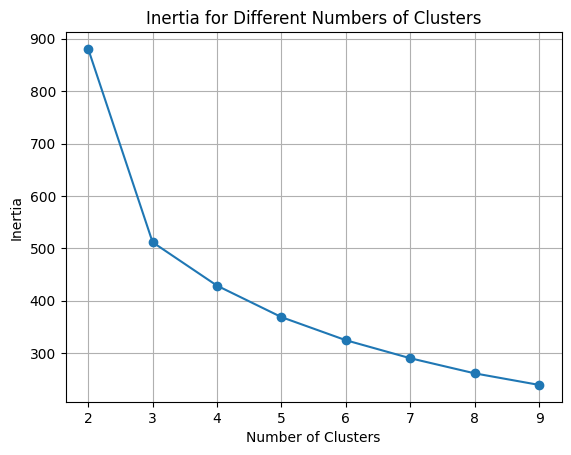

In [18]:
plt.plot(list(silhouette.keys()),inertia, marker='o')
plt.title('Inertia for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(2, 10))
plt.grid(True)
plt.show()

c:\Users\debug system\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


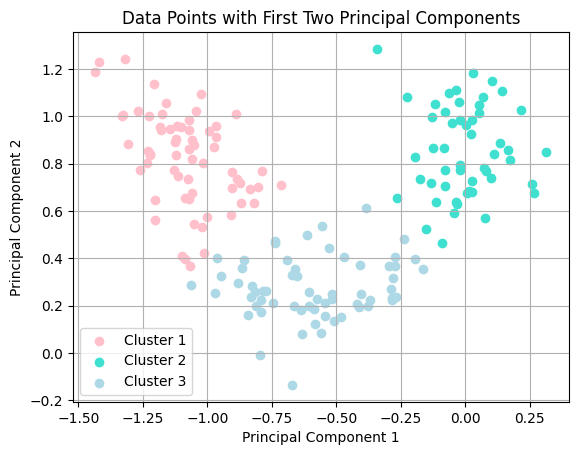

In [19]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans1 = model_kmeans.fit_predict(pca_std_datapoint2)

# Define colors
colors = ['pink', 'turquoise', 'lightblue']

# Loop through unique cluster labels
for cluster_label, color in zip(np.unique(y_predict_kmeans1), colors):
    # Extract data points belonging to the current cluster
    cluster_data = pca_std_datapoint2[y_predict_kmeans1 == cluster_label]
    
    # Plot the data points for the current cluster
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_label+1}', color=color)

plt.title('Data Points with First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


Compare the results of different scaling methods in a PCA problem

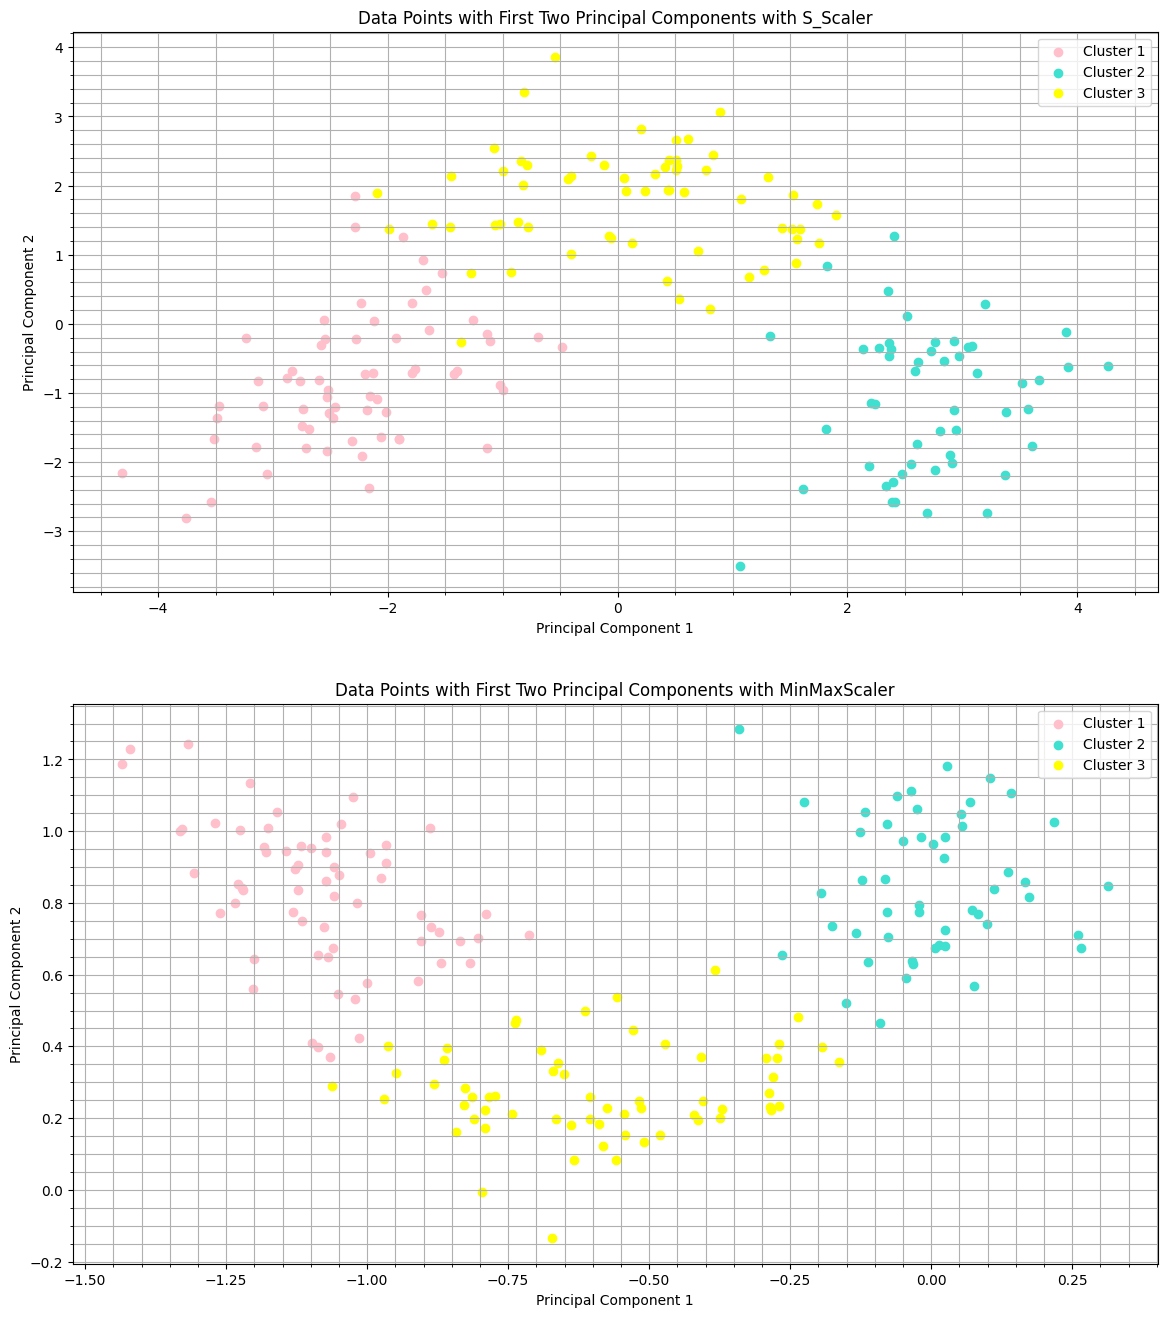

In [20]:
plt.figure(figsize=(14, 16))

plt.subplot(2, 1, 1)
colors1 = ['pink', 'turquoise', 'yellow']

for cluster_label, color in zip(np.unique(y_predict_kmeans1), colors1):
    cluster_data = pca_std_datapoint1[y_predict_kmeans1 == cluster_label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_label+1}', color=color)

plt.title('Data Points with First Two Principal Components with S_Scaler')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid('True','both')
plt.minorticks_on()
plt.subplot(2, 1, 2)

colors2 = ['pink', 'turquoise', 'yellow']

for cluster_label, color in zip(np.unique(y_predict_kmeans1), colors2):
    cluster_data = pca_std_datapoint2[y_predict_kmeans1 == cluster_label]
    
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_label+1}', color=color)

plt.title('Data Points with First Two Principal Components with MinMaxScaler')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid('True','both')
plt.minorticks_on()

plt.show()


nitially, it's important to note the distinction in the range of values between these two methods. MinMaxScaler adjusts the range to be between -1 and 1, whereas the other method simply centers the data around zero by utilizing a Gaussian distribution:

$z = \dfrac{x-\mu}{\sigma}$

The decision between MinMaxScaler and StandardScaler can influence the effectiveness of clustering algorithms. Certain algorithms may yield better results with data scaled to a specific range, such as [0, 1], while others may perform more effectively with standardized data (mean = 0, standard deviation = 1).